# CIFAR - 10
## An Image Classification Dataset

### Step - 1 ( download dataset, extract it and store it )

In [1]:
import cifar10
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cifar10.data_path = "data/CIFAR-10/"

In [3]:
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [4]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [5]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [6]:
images_train.shape, images_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

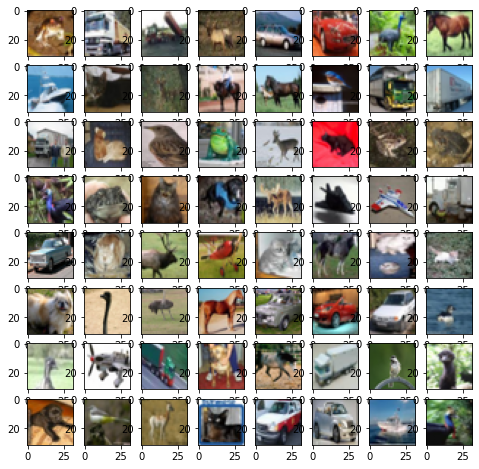

In [7]:
# data visualization
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(images_train[i], cmap = plt.cm.bone)
plt.show()

In [8]:
cls_train.shape, cls_test.shape

((50000,), (10000,))

### Step - 2 ( Feature Reduction Using Principal Component Analysis (PCA) )

In [9]:
# transforming each image into a large 1D list
x_train = images_train.reshape(50000, 32 * 32 * 3)
x_train.shape

(50000, 3072)

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA()
pca.fit(x_train)

PCA()

In [12]:
pca.components_.shape

(3072, 3072)

In [13]:
# calculating optimal k by keeping 95% variance
k = 0
total = np.sum(pca.explained_variance_)
currentVariance = 0
while currentVariance/total < 0.95:
    currentVariance += pca.explained_variance_[k]
    k += 1
k

217

In [14]:
pca = PCA(n_components = k, whiten = True)
x_train_pca = pca.fit_transform(x_train)

In [15]:
x_train_approx = pca.inverse_transform(x_train_pca)

In [16]:
x_train_approx_image = x_train_approx.reshape(50000, 32, 32, 3)
x_train_approx_image.shape

(50000, 32, 32, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

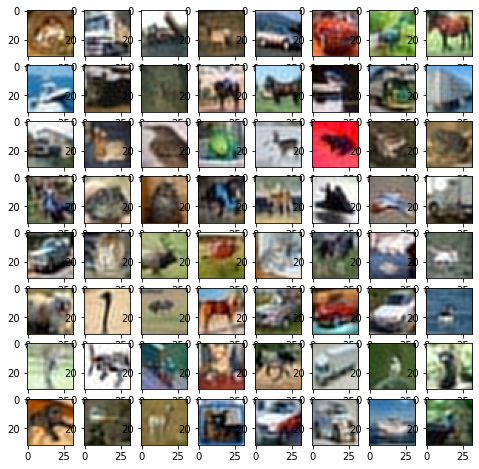

In [17]:
# visualing data after applying pca
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(x_train_approx_image[i], cmap = plt.cm.bone)
plt.show()

Seems like we are able to retain a lot of information with just 658 features

In [18]:
x_test = images_test.reshape(10000, 32 * 32 * 3)

In [19]:
x_test_pca = pca.transform(x_test)

In [20]:
y_train = cls_train
y_test = cls_test

### Step - 3 ( Apply Classification Algorithms )

Logistic Regression Classifier

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lr_clf = LogisticRegression(C=1)
lr_clf.fit(x_train_pca, y_train)

LogisticRegression(C=1)

In [23]:
lr_clf.score(x_test_pca, y_test)

0.4081

Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
rf_clf.fit(x_train_pca, y_train)

RandomForestClassifier(random_state=0)

In [26]:
rf_clf.score(x_test_pca, y_test)

0.441

Gaussian NaiveBayes Classifier

In [27]:
from sklearn.naive_bayes import GaussianNB

In [28]:
gNB_clf = GaussianNB()
gNB_clf.fit(x_train_pca, y_train)

GaussianNB()

In [29]:
gNB_clf.score(x_test_pca, y_test)

0.3147

KNN Classifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [31]:
knn_clf = KNeighborsClassifier()
grid = {
    'n_neighbors': [5, 7, 9],
}
gs_cv = GridSearchCV(knn_clf, grid)
gs_cv.fit(x_train_pca, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 7, 9]})

In [32]:
gs_cv.score(x_test_pca, y_test)

0.2279

SVM Classifier

In [33]:
from sklearn import svm

In [34]:
svm_clf = svm.SVC(kernel='rbf')
svm_clf.fit(x_train_pca, y_train)

SVC()

In [35]:
svm_clf.score(x_test_pca, y_test)

0.5518

Seems like we are getting the maximum score by using Support Vector Machines (SVM) i.e. 0.55 .

In [36]:
# Predictions of test data
y_pred = svm_clf.predict(x_test_pca)

In [37]:
y_pred_class_names = []
for y in y_pred:
    y_pred_class_names.append(class_names[y])

In [38]:
np.savetxt('Cifar10.csv', y_pred_class_names, delimiter = ',', fmt = '%s')